# Exploratory Data Analysis & Initial Feature Engineering – E-Commerce Transactions

**Objective**: Perform comprehensive exploratory data analysis on the e-commerce fraud dataset, integrate geolocation information early, uncover fraud patterns (especially by country), and create initial meaningful features — all in preparation for modeling.
This notebook combines parts of data cleaning, geolocation integration, EDA, and feature engineering specific to `Fraud_Data.csv`.
______
## 1. Setup and Data Loading


In [1]:
import sys
import os
# Add project root (one directory above "notebooks")
sys.path.append(os.path.abspath(".."))

In [2]:
# include necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_cleaning import remove_duplicates,remove_missing_values
from src.data_processing import map_ips_to_countries

In [3]:
# load data
fraud_df = pd.read_csv('../data/raw/Fraud_Data.csv')
ip_df = pd.read_csv('../data/raw/IpAddress_to_Country.csv')  #needed in the future to merge with fraud_df

# correct data types
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])
fraud_df['class'] = fraud_df['class'].astype(int)


In [3]:
# quick check
display(fraud_df.head())
display(fraud_df.info())
display(fraud_df.describe(include='all'))

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int32         
dtypes: datetime64[ns](2), float64(1), int32(1), int64(3), object(4)
memory usage: 12.1+ MB


None

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
count,151112.000000,151112,151112,151112.000000,151112,151112,151112,151112,151112.000000,1.511120e+05,151112.000000
unique,NaN,NaN,NaN,NaN,137956,3,5,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,CQTUVBYIWWWBC,SEO,Chrome,M,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,20,60615,61432,88293,NaN,NaN,NaN
mean,200171.040970,2015-04-20 00:56:09.511329280,2015-06-16 02:56:38.759952896,36.935372,NaN,NaN,NaN,NaN,33.140704,2.152145e+09,0.093646
min,2.000000,2015-01-01 00:00:42,2015-01-01 00:00:44,9.000000,NaN,NaN,NaN,NaN,18.000000,5.209350e+04,0.000000
25%,100642.500000,2015-02-18 09:52:48.500000,2015-04-18 14:41:25.500000,22.000000,NaN,NaN,NaN,NaN,27.000000,1.085934e+09,0.000000
50%,199958.000000,2015-04-19 04:41:30,2015-06-18 13:46:17.500000,35.000000,NaN,NaN,NaN,NaN,33.000000,2.154770e+09,0.000000
75%,300054.000000,2015-06-18 14:47:22.750000128,2015-08-17 18:48:31.500000,49.000000,NaN,NaN,NaN,NaN,39.000000,3.243258e+09,0.000000
max,400000.000000,2015-08-18 04:40:29,2015-12-16 02:56:05,154.000000,NaN,NaN,NaN,NaN,76.000000,4.294850e+09,1.000000


## 2. Data Cleaning

In [5]:
# Drop missing values (Justification: Data integrity is critical for fraud detection)
fraud_df=remove_missing_values(fraud_df)

✅ No missing values detected. Dataset is clean.


In [6]:
# Clean Duplicates
fraud_df = remove_duplicates(fraud_df)

Initial Row Count: 151,112
Duplicate Rows Found: 0
Rows After Cleaning: 151,112
✅ No duplicates found.


Geolocation Integration

In [4]:
fraud_df = map_ips_to_countries(fraud_df, ip_df)

# Check the results
print(fraud_df['country'].value_counts().head())

Merging IP data (this may take a moment)...
country
United States     58049
Unknown           21966
China             12038
Japan              7306
United Kingdom     4490
Name: count, dtype: int64


In [5]:
fraud_df['country'].isna().sum()

0

# 3. Exploratory Data Analysis

Matplotlib is building the font cache; this may take a moment.


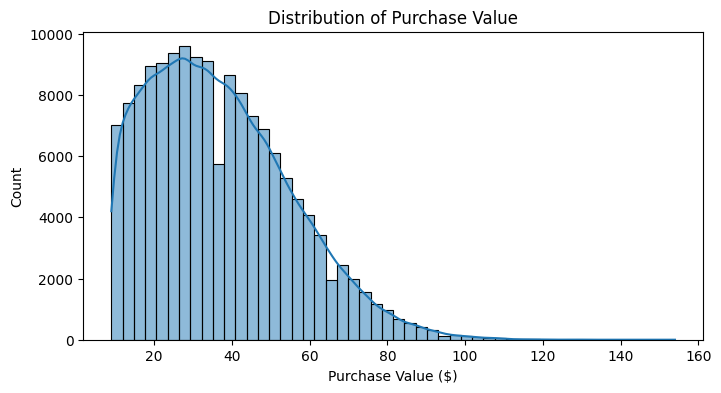

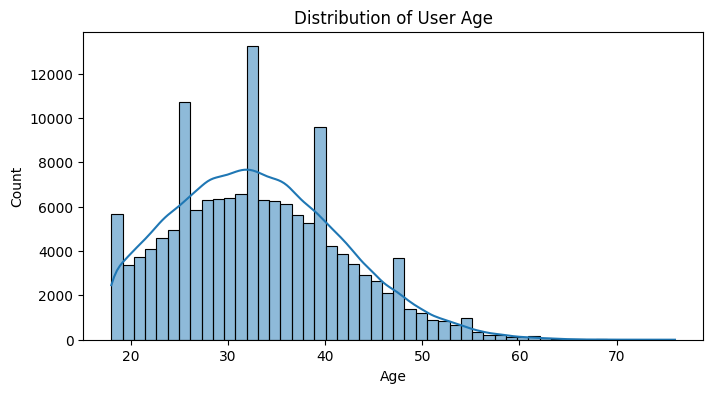

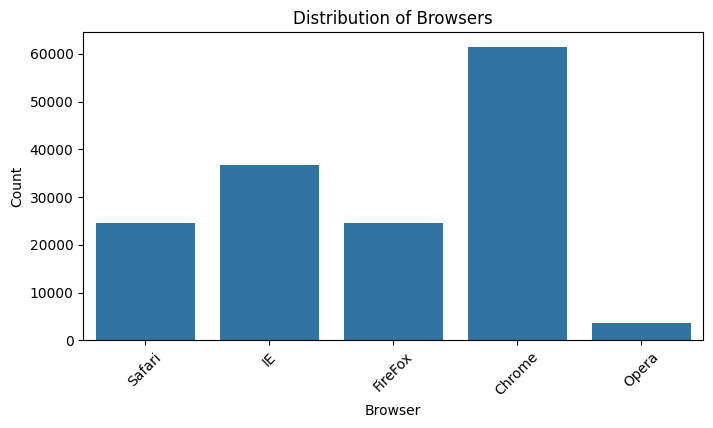

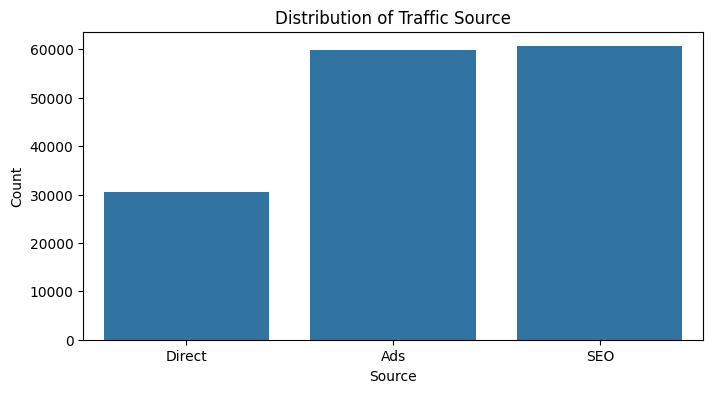

In [ ]:
# ============================
# Univariate Analysis - Fraud Data
# ============================

# Histogram for purchase_value
plt.figure(figsize=(8,4))
sns.histplot(fraud_df['purchase_value'], bins=50, kde=True)
plt.title("Distribution of Purchase Value")
plt.xlabel("Purchase Value ($)")
plt.ylabel("Count")
plt.show()


# Histogram for age
plt.figure(figsize=(8,4))
sns.histplot(fraud_df['age'], bins=50, kde=True)
plt.title("Distribution of User Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


# Bar plot for browser usage
plt.figure(figsize=(8,4))
sns.countplot(x='browser', data=fraud_df)
plt.title("Distribution of Browsers")
plt.xlabel("Browser")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


# Bar plot for source
plt.figure(figsize=(8,4))
sns.countplot(x='source', data=fraud_df)
plt.title("Distribution of Traffic Source")
plt.xlabel("Source")
plt.ylabel("Count")
plt.show()


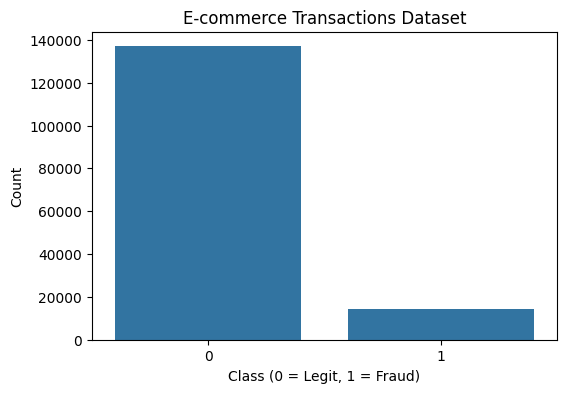

Class Distribution (%):
class
0    90.635423
1     9.364577
Name: proportion, dtype: float64


: 

In [ ]:
# ==================================
# Class Imbalance Visualization
# ==================================

plt.figure(figsize=(6,4))
sns.countplot(x='class', data=fraud_df)
plt.title("E-commerce Transactions Dataset")
plt.xlabel("Class (0 = Legit, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

# Print percentage distribution
fraud_rate = fraud_df['class'].value_counts(normalize=True) * 100
print("Class Distribution (%):")
print(fraud_rate)


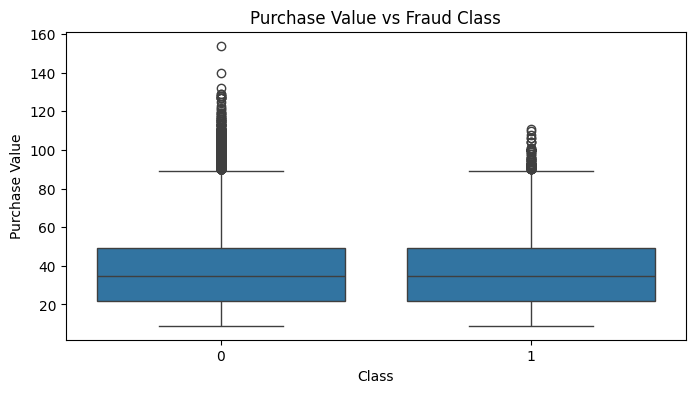

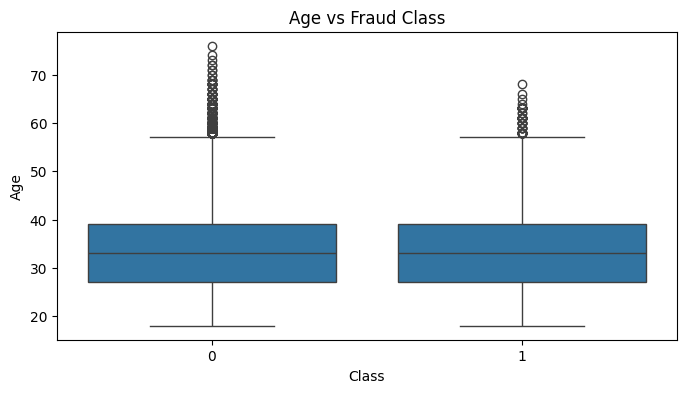

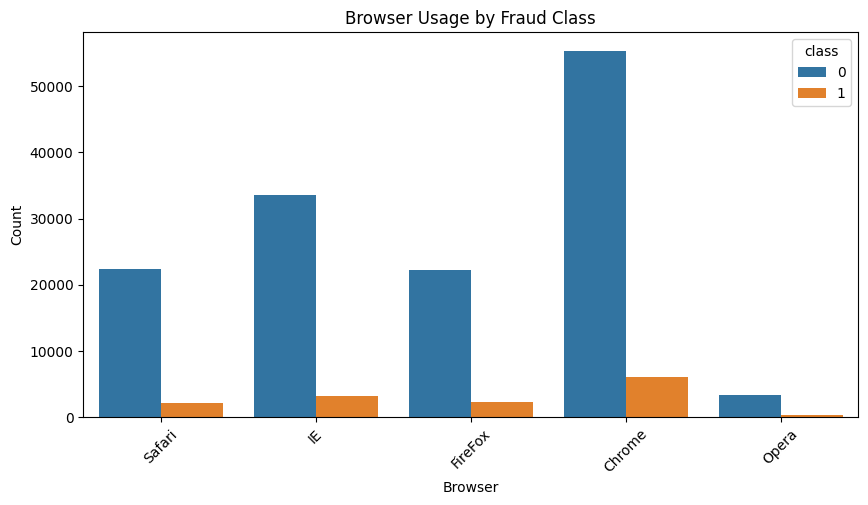

In [55]:
# ==================================
# Bivariate Analysis
# ==================================

# Purchase value vs class
plt.figure(figsize=(8,4))
sns.boxplot(x='class', y='purchase_value', data=fraud_df)
plt.title("Purchase Value vs Fraud Class")
plt.xlabel("Class")
plt.ylabel("Purchase Value")
plt.show()

# Age vs class
plt.figure(figsize=(8,4))
sns.boxplot(x='class', y='age', data=fraud_df)
plt.title("Age vs Fraud Class")
plt.xlabel("Class")
plt.ylabel("Age")
plt.show()

# Browser vs class
plt.figure(figsize=(10,5))
sns.countplot(x='browser', hue='class', data=fraud_df)
plt.title("Browser Usage by Fraud Class")
plt.xlabel("Browser")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


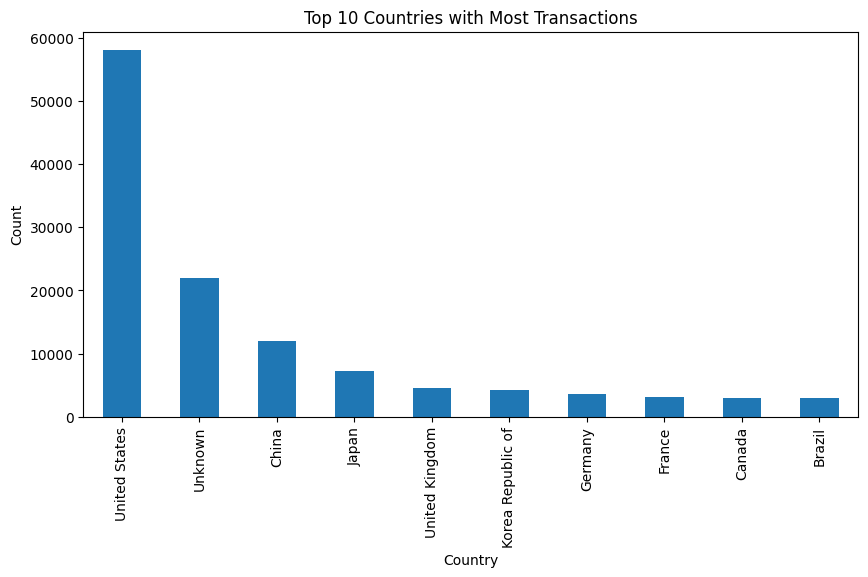

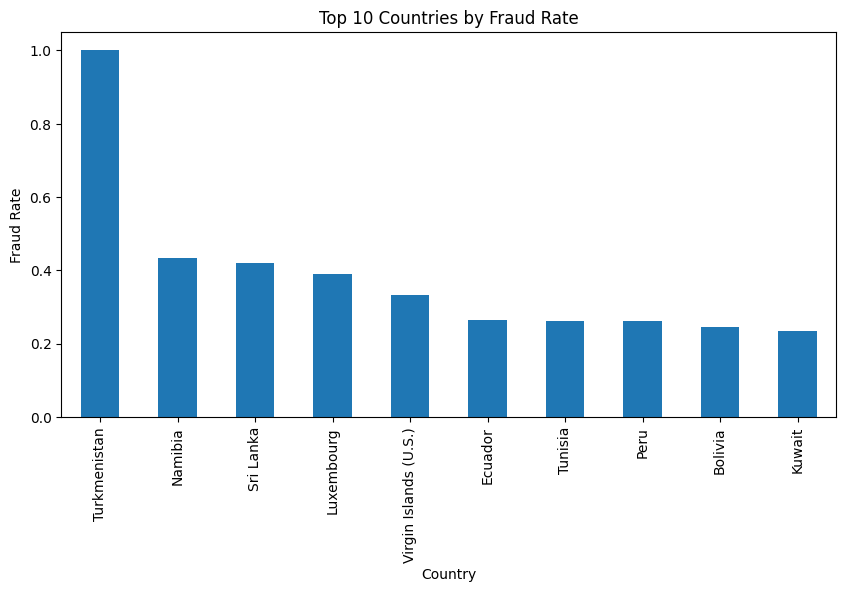


Countries with highest fraud rates (Top 10):
country
Turkmenistan             1.000000
Namibia                  0.434783
Sri Lanka                0.419355
Luxembourg               0.388889
Virgin Islands (U.S.)    0.333333
Ecuador                  0.264151
Tunisia                  0.262712
Peru                     0.260504
Bolivia                  0.245283
Kuwait                   0.233333
Name: class, dtype: float64


In [56]:
# ==================================
# Fraud by Country Analysis
# ==================================

# Top 10 countries by total transactions
plt.figure(figsize=(10,5))
fraud_df['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Countries with Most Transactions")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

# Fraud rate by country
country_fraud_rate = fraud_df.groupby('country')['class'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
country_fraud_rate.head(10).plot(kind='bar')
plt.title("Top 10 Countries by Fraud Rate")
plt.xlabel("Country")
plt.ylabel("Fraud Rate")
plt.show()

print("\nCountries with highest fraud rates (Top 10):")
print(country_fraud_rate.head(10))
